From the international breweries data recorded for a duration of three years, you are
directed to do the following analyses to aid better decision making in order to maximize
profit and reduce loss to the lowest minimum.
Session A

PROFIT ANALYSIS

1. Within the space of the last three years, what was the profit worth of the breweries,
inclusive of the anglophone and the francophone territories?
2. Compare the total profit between these two territories in order for the territory manager,
Mr. Stone made a strategic decision that will aid profit maximization in 2020.
3. Country that generated the highest profit in 2019
4. Help him find the year with the highest profit.
5. Which month in the three years was the least profit generated?
6. What was the minimum profit in the month of December 2018?
7. Compare the profit in percentage for each of the month in 2019
8. Which particular brand generated the highest profit in Senegal?

In [1]:
#using inline plot
%matplotlib inline

#importing libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the data from a csv file
df = pd.read_csv("C:\\Users\\ASUS\\Documents\\data_bank\\Brewery_data\\International_Breweries.csv")

In [3]:
#display the data frame
df

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,11143,Jardine,jard@gmail.com,grand malt,90,150,962,144300,57720,Togo,northeast,November,2017
1043,11144,Jardine,jard@gmail.com,trophy,150,200,892,178400,44600,Benin,northcentral,December,2017
1044,11145,Andrews,andy@gmail.com,budweiser,250,500,816,408000,204000,Senegal,Southeast,January,2019
1045,11146,Jones,jone.ai@yahoo.com,castle lite,180,450,939,422550,253530,Ghana,west,February,2017


In [4]:
#display information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SALES_ID    1047 non-null   int64 
 1   SALES_REP   1047 non-null   object
 2   EMAILS      1047 non-null   object
 3   BRANDS      1047 non-null   object
 4   PLANT_COST  1047 non-null   int64 
 5   UNIT_PRICE  1047 non-null   int64 
 6   QUANTITY    1047 non-null   int64 
 7   COST        1047 non-null   int64 
 8   PROFIT      1047 non-null   int64 
 9   COUNTRIES   1047 non-null   object
 10  REGION      1047 non-null   object
 11  MONTHS      1047 non-null   object
 12  YEARS       1047 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 106.5+ KB


In [5]:
#get some of the measures of central tendencies and dispersions
df.describe()

,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,YEARS
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,10624.000000,152.989494,271.728749,850.737345,231034.049666,100847.583572,2017.941738
std,302.387169,53.125477,133.378553,86.991652,115658.626612,77581.775930,0.808325
min,10101.000000,80.000000,150.000000,700.000000,105300.000000,35000.000000,2017.000000
25%,10362.500000,90.000000,150.000000,776.000000,141425.000000,46880.000000,2017.000000
50%,10624.000000,150.000000,200.000000,853.000000,184400.000000,58080.000000,2018.000000
75%,10885.500000,180.000000,450.000000,927.000000,351450.000000,191205.000000,2019.000000
max,11147.000000,250.000000,500.000000,1000.000000,499500.000000,269190.000000,2019.000000


In [6]:
#check if there are null values/empty rows
df.isnull().sum()

SALES_ID      0
SALES_REP     0
EMAILS        0
BRANDS        0
PLANT_COST    0
UNIT_PRICE    0
QUANTITY      0
COST          0
PROFIT        0
COUNTRIES     0
REGION        0
MONTHS        0
YEARS         0
dtype: int64

In [7]:
#checking for duplicates
df[df.duplicated()]


,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS


The above shows that the data does not have empty rows,does not have duplicate vslues.  it also implies that the data is relatively clean

In [8]:
# 1. Within the space of the last three years, what was the profit worth of the breweries,
#inclusive of the anglophone and the francophone territories?
prof_worth= df.groupby(["YEARS","COUNTRIES"])["PROFIT"].sum()
prof_worth

YEARS  COUNTRIES
2017   Benin        7795390
       Ghana        7176000
       Nigeria      8573550
       Senegal      8289100
       Togo         6669280
2018   Benin        7893240
       Ghana        6692980
       Nigeria      7997340
       Senegal      6508530
       Togo         7971760
2019   Benin        5273340
       Ghana        7144070
       Nigeria      4805320
       Senegal      6687560
       Togo         6109960
Name: PROFIT, dtype: int64

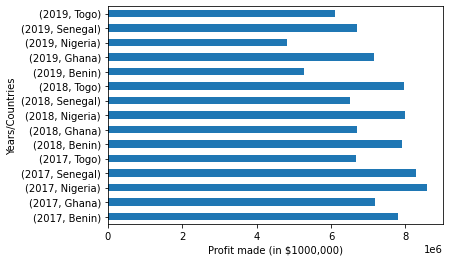

In [9]:
#plot the chart
prof_worth.plot(kind='barh')
plt.xlabel("Profit made (in $1000,000)")
plt.ylabel("Years/Countries")
plt.show()

In [10]:
#check the number of unique years in the dataframe
df["YEARS"].unique()

array([2019, 2018, 2017], dtype=int64)

In [11]:
#a breakdown of profits by the years (2017, 2018,2019)
prof_by_year= df.groupby("YEARS")["PROFIT"].sum()
prof_by_year

YEARS
2017    38503320
2018    37063850
2019    30020250
Name: PROFIT, dtype: int64

Text(0, 0.5, 'Profit in ($1000,000)')

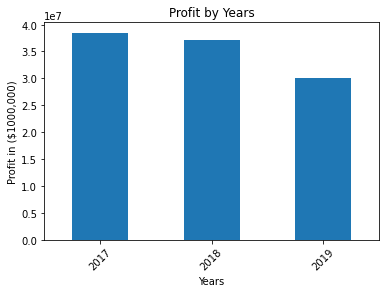

In [12]:
#plotthe chart
prof_by_year.plot(kind="bar")
plt.xticks(rotation=45)
plt.title("Profit by Years")
plt.xlabel("Years")
plt.ylabel("Profit in ($1000,000)")

In [13]:
#the profit for 3year is the total profit of the brewery
df["PROFIT"].sum()

105587420


## the breakdown of the profits by there years is given 
## in 2017 profit  was 38503320 USD, in 2018 profit  was  37063850USD  and in 2019 it was 30020250USD and also the  total profits within  the three years running is 105587420USD

In [14]:
#2. Compare the total profit between these two territories in order for the territory manager, 
#Mr. Stone made a strategic decision that will aid profit maximization in 2020

In [15]:
df["COUNTRIES"].unique()

array(['Ghana', 'Nigeria', 'Togo', 'Benin', 'Senegal'], dtype=object)

In [16]:
#creating Anglo_territory column 
df["ANGLO_TERRITORY"]= df["COUNTRIES"].all() == "Nigeria" or df["COUNTRIES"].all() == 'Ghana'



In [17]:
#creating the francophone Territory column
df["FRANCO_TERRITORY"]= df["COUNTRIES"].all() != "Nigeria" or df["COUNTRIES"].all() != 'Ghana'
df.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,ANGLO_TERRITORY,FRANCO_TERRITORY
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,True,True
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,True,True
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,True,True
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,True,True
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,True,True


In [18]:
#Compare the total profit between these two territories
df.groupby(["PROFIT"])["ANGLO_TERRITORY"].sum()

PROFIT
35000     1
35050     1
35100     1
35200     2
35250     1
         ..
266760    1
267030    2
267840    1
268650    1
269190    2
Name: ANGLO_TERRITORY, Length: 762, dtype: int64

In [19]:
#3. Country that generated the highest profit in 2019   
df_yr2019 = df[df["YEARS"]==2019]

high_prof_2019= df_yr2019.groupby(["COUNTRIES"])["PROFIT"].max().sort_values()
high_prof_2019

COUNTRIES
Nigeria    250290
Benin      255690
Togo       261360
Ghana      269190
Senegal    269190
Name: PROFIT, dtype: int64

Text(0, 0.5, 'PROFIT ($)')

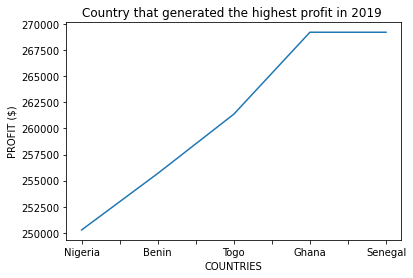

In [20]:
#plot the chart
high_prof_2019.plot(kind="line")
plt.title("Country that generated the highest profit in 2019 ")
plt.ylabel("PROFIT ($)")

## from the output above it is clear that SENEGAL and GHANA have the highest profit in 2019,which is 269190USD for both countries

In [21]:
correl= df.corr()
correl

,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,YEARS,ANGLO_TERRITORY,FRANCO_TERRITORY
SALES_ID,1.000000,-0.000577,0.000001,0.056496,0.009204,0.006283,-0.000814,NaN,NaN
PLANT_COST,-0.000577,1.000000,0.879548,0.007059,0.857338,0.699682,-0.018648,NaN,NaN
UNIT_PRICE,0.000001,0.879548,1.000000,-0.011710,0.974369,0.946370,-0.033914,NaN,NaN
QUANTITY,0.056496,0.007059,-0.011710,1.000000,0.190842,0.108184,0.028306,NaN,NaN
COST,0.009204,0.857338,0.974369,0.190842,1.000000,0.957478,-0.027228,NaN,NaN
PROFIT,0.006283,0.699682,0.946370,0.108184,0.957478,1.000000,-0.035541,NaN,NaN
YEARS,-0.000814,-0.018648,-0.033914,0.028306,-0.027228,-0.035541,1.000000,NaN,NaN
ANGLO_TERRITORY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRANCO_TERRITORY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'SALES_ID'),
  Text(2, 0, 'PLANT_COST'),
  Text(3, 0, 'UNIT_PRICE'),
  Text(4, 0, 'QUANTITY'),
  Text(5, 0, 'COST'),
  Text(6, 0, 'PROFIT'),
  Text(7, 0, 'YEARS'),
  Text(8, 0, 'ANGLO_TERRITORY'),
  Text(9, 0, 'FRANCO_TERRITORY')])

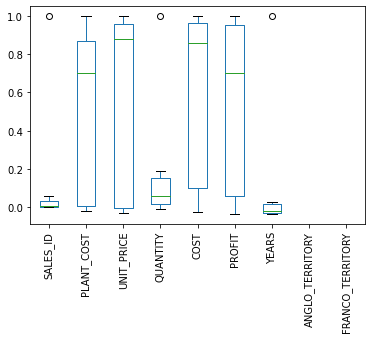

In [22]:
correl.plot(kind="box")
plt.xticks(rotation=90)

In [23]:
#4. Help him find the year with the highest profit.
yr_with_hgst_prof = df.groupby(["YEARS"])["PROFIT"].max()
yr_with_hgst_prof

YEARS
2017    268650
2018    267840
2019    269190
Name: PROFIT, dtype: int64

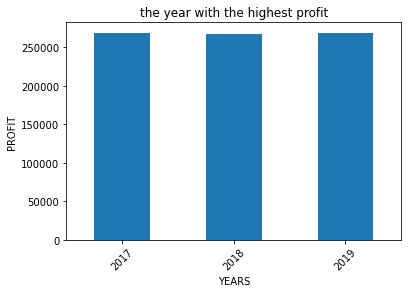

In [24]:
yr_with_hgst_prof.plot(kind="bar")
plt.title("the year with the highest profit")
plt.xticks(rotation=45)
plt.ylabel("PROFIT")
plt.show()

## 4. The output above shows that the year with the highest profit is year 2019 which have a profit of 269190USD 

In [25]:
#5. Which month in the three years was the least profit generated?

mth_yr_least_prof = df.groupby(["YEARS","MONTHS"])["PROFIT"].min().sort_values()
mth_yr_least_prof

YEARS  MONTHS   
2017   December     35000
       February     35050
2018   April        35100
2017   June         35200
2019   August       35200
2018   June         35250
2019   June         35300
       February     35300
       December     35300
2018   February     35350
2019   November     35450
2017   October      35450
2019   September    35500
2018   March        35750
       May          35800
2017   April        36200
2019   January      36250
2017   May          36350
       August       36400
2019   April        36550
2018   July         36550
2017   July         36900
2018   January      36950
       September    37100
       August       37500
       October      37850
       December     38150
2019   March        38500
       October      38650
2018   November     38750
2017   November     38850
2019   July         39350
2017   January      40650
       March        40850
2019   May          41400
2017   September    41750
Name: PROFIT, dtype: int64

Text(0, 0.5, 'PROFIT ($)')

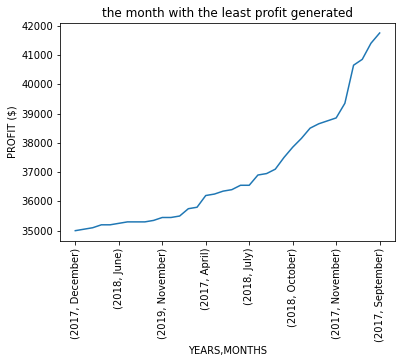

In [26]:
mth_yr_least_prof.plot(kind="line")
plt.title("the month with the least profit generated")
plt.xticks(rotation=90)
plt.ylabel("PROFIT ($)")

from the illustration above , it is clear that the month with the least profit is December 2017

In [27]:
#6 What was the minimum profit in the month of December 2018?
df_yr2018 = df[df["YEARS"]==2018]
min_prof_dec_2018= df_yr2018.groupby(["MONTHS","YEARS"])["PROFIT"].min().sort_values()
min_prof_dec_2018

MONTHS     YEARS
April      2018     35100
June       2018     35250
February   2018     35350
March      2018     35750
May        2018     35800
July       2018     36550
January    2018     36950
September  2018     37100
August     2018     37500
October    2018     37850
December   2018     38150
November   2018     38750
Name: PROFIT, dtype: int64

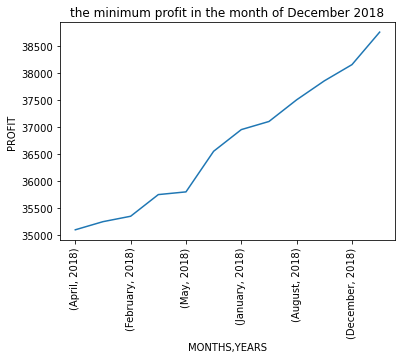

In [28]:
min_prof_dec_2018.plot(kind="line")
plt.title("the minimum profit in the month of December 2018")
plt.xticks(rotation=90)
plt.ylabel("PROFIT")
plt.show()

## 6. from the above output it shows that the minimum profit for the month of April 2018

In [61]:
#7. Compare the profit in percentage for each of the month in 2019
df["PERCENT_PROFIT"] = (df["PROFIT"] / df["COST"])*100

df.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,ANGLO_TERRITORY,FRANCO_TERRITORY,PERCENT_PROFIT
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,True,True,25.0
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,True,True,50.0
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,True,True,60.0
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,True,True,32.0
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,True,True,25.0


In [32]:
df_yr2019 = df[df["YEARS"]==2019]

perc_prof_mth_2019= df_yr2019.groupby(["MONTHS"])["PERCENT_PROFIT"].sum().sort_values()
perc_prof_mth_2019

MONTHS
February      648.000000
October       855.666667
December      869.333333
September     942.000000
April        1035.333333
March        1060.666667
August       1074.000000
May          1091.333333
July         1101.666667
November     1140.333333
June         1140.666667
January      1249.666667
Name: PERCENT_PROFIT, dtype: float64

<AxesSubplot:xlabel='MONTHS'>

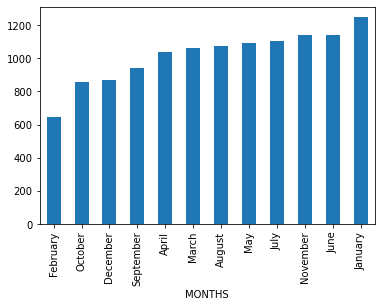

In [33]:
perc_prof_mth_2019.plot(kind="bar")

In [ ]:
#df.groupby("YEARS")["PERCENT_PROFIT"].sum()

In [34]:
#8. Which particular brand generated the highest profit in Senegal?

df_sen = df[df["COUNTRIES"]=="Senegal"]
sen_brand_prof = df_sen.groupby(["BRANDS"])["PROFIT"].max()
sen_brand_prof

BRANDS
beta malt       69720
budweiser      249500
castle lite    269190
eagle lager     79280
grand malt      59520
hero            49950
trophy          49750
Name: PROFIT, dtype: int64

Text(0, 0.5, 'BRANDS')

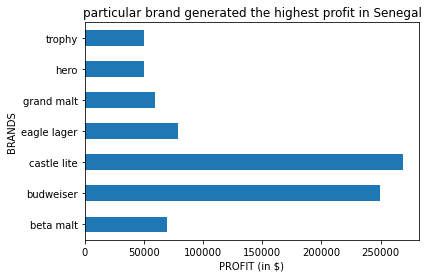

In [35]:
sen_brand_prof.plot(kind="barh")
plt.title("particular brand generated the highest profit in Senegal")
plt.xlabel("PROFIT (in $)")
plt.ylabel("BRANDS")

## 8. From the above output it is seen that in Senegal the brand with the highest profit is CASTLE LITE , which is 269190USD




Session B


BRAND ANALYSIS
1. Within the last two years, the brand manager wants to know the top three brands
consumed in the francophone countries
2. Find out the top two choice of consumer brands in Ghana
3. Find out the details of beers consumed in the past three years in the most oil reached
country in West Africa.
4. Favorites malt brand in Anglophone region between 2018 and 2019
5. Which brands sold the highest in 2019 in Nigeria?
6. Favorites brand in South_South region in Nigeria
7. Bear consumption in Nigeria
8. Level of consumption of Budweiser in the regions in Nigeria
9. Level of consumption of Budweiser in the regions in Nigeria in 2019 (Decision on Promo

In [ ]:
#Within the last two years, the brand manager wants to know the top three brands consumed in the francophone countries
df.groupby(["YEARS","BRANDS"])["FRANCO_TERRITORY"].count()



In [42]:
#2. Find out the top two choice of consumer brands in Ghana
df_gha = df[df["COUNTRIES"]=="Ghana"]
choic_gh_brand= df_gha.groupby(["BRANDS"])["PROFIT"].sum().sort_values()
choic_gh_brand

BRANDS
trophy         1276200
hero           1282700
grand malt     1536900
beta malt      1778560
eagle lager    2066320
budweiser      6104750
castle lite    6967620
Name: PROFIT, dtype: int64

Text(0, 0.5, 'PROFIT (In 1,000,000)')

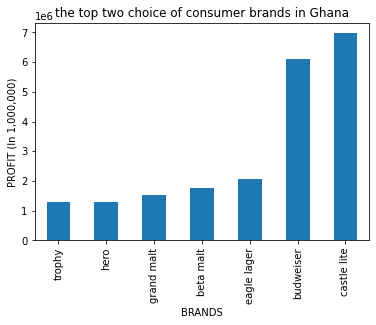

In [44]:
choic_gh_brand.plot(kind="bar")
plt.title("the top two choice of consumer brands in Ghana")
plt.ylabel("PROFIT (In 1,000,000)")

## 2. from the above output, thetwo major brand choice of consumers in ghana is  Castle Lite (with aprofit of 6967620USD) and Budweiser (with aprofit of 6104750USD)

In [50]:
#3. Find out the details of beers consumed in the past three years in the most oil rich country in West Africa

#n/b: the most oilrich country in west Africa is Nigeria, and 
#from profit made we can determine gainful consumption of beer brands
df_nig = df[df["COUNTRIES"]=="Nigeria"]
nig_beer_cosumption = df_nig.groupby(["YEARS","BRANDS"])["BRANDS"].count()
nig_beer_cosumption

YEARS  BRANDS     
2017   beta malt      10
       budweiser      14
       castle lite    11
       eagle lager    14
       grand malt     11
       hero           11
       trophy         10
2018   beta malt      10
       budweiser      10
       castle lite    15
       eagle lager     6
       grand malt      9
       hero            8
       trophy         13
2019   beta malt      10
       budweiser       6
       castle lite     4
       eagle lager    10
       grand malt     10
       hero           11
       trophy          7
Name: BRANDS, dtype: int64

Text(0.5, 1.0, 'beers consumed in the past three years in the most oil rich country in West Africa')

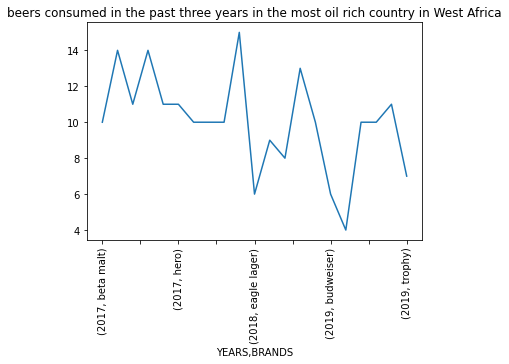

In [54]:
#plots
nig_beer_cosumption.plot(kind="line")
plt.xticks(rotation=90)
plt.title("beers consumed in the past three years in the most oil rich country in West Africa")

## 3. from the above output Nigeria (which is the most oil-rich nations in west Africa) consume Budweiser, Castle Lite, Eagle Lager, Hero and Trophy.                                                (N/b Beta malt and Grand Malt are not Beer)

In [ ]:
# 4. Favorites malt brand in Anglophone region between 2018 and 2019


In [58]:
# 5. Which brands sold the highest in 2019 in Nigeria?
df_nig_yr2019= df_yr2019[df_yr2019["COUNTRIES"]=="Nigeria"]
nig_2019= df_nig_yr2019.groupby(["BRANDS"])["PROFIT"].sum().sort_values()
nig_2019

BRANDS
trophy          290150
hero            481100
grand malt      487500
beta malt       587230
eagle lager     672080
castle lite     914760
budweiser      1372500
Name: PROFIT, dtype: int64

<AxesSubplot:ylabel='PROFIT'>

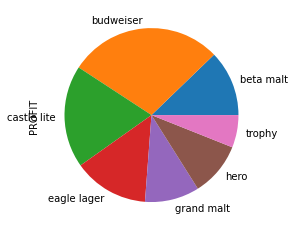

In [57]:
nig_2019.plot(kind='pie')

## 5. The brand with the highest sales in Nigeria is Budweiser (1372500USD) 

In [75]:
#6. Favorites brand in South_South region  of nigeria

#df for nigeria
df_nig =df[df["COUNTRIES"]=='Nigeria']

#df_nig[df_nig["REGION"]=='Soutsouth']

In [66]:
# 7. Bear consumption in Nigeria

nig_beer_intake = df_nig.groupby(["BRANDS"])["PROFIT"].sum()
nig_beer_intake

BRANDS
beta malt      1776670
budweiser      6538250
castle lite    6933870
eagle lager    2069760
grand malt     1479960
hero           1290550
trophy         1287150
Name: PROFIT, dtype: int64

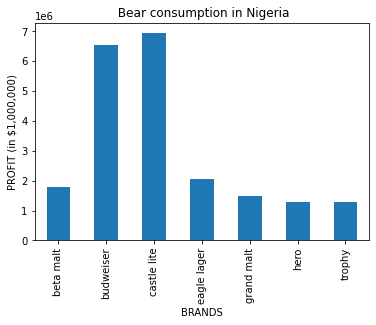

In [69]:
nig_beer_intake.plot(kind="bar")
plt.title(" Bear consumption in Nigeria")
plt.ylabel("PROFIT (in $1,000,000)")
plt.show()

Castle lite and Budwieser are two beer brand that are most consumed in Nigeria

## 9. Level of consumption of Budweiser in the regions in Nigeria in 2019 (Decision on Promo)

In [86]:
df_nig= df[df["COUNTRIES"]=='Nigeria']
df_nig_2019= df_nig[df_nig["YEARS"]==2019]
bud_cons = df_nig_2019.groupby("BRANDS")["PROFIT"].sum().sort_values()
bud_cons

BRANDS
trophy          290150
hero            481100
grand malt      487500
beta malt       587230
eagle lager     672080
castle lite     914760
budweiser      1372500
Name: PROFIT, dtype: int64

Text(0, 0.5, 'PROFIT (in $1,000,000)')

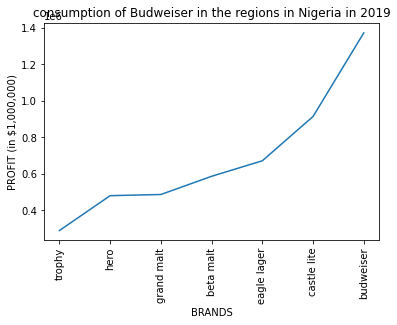

In [90]:
bud_cons.plot(kind = "line")
plt.title("consumption of Budweiser in the regions in Nigeria in 2019")
plt.xticks(rotation =90)
plt.ylabel("PROFIT (in $1,000,000)")

the consuption of Budweiser in Nigeria in 2019,was the highest. the marketing team should continue their promo